In [320]:
# import all necessary library
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import io
import pandas as pd
#import osmnx as ox

In [321]:
# Dictionary mapping abbreviations to full county names
county_full_names = {
    'ALA': 'Alameda',
    'ALP': 'Alpine',
    'AMA': 'Amador',
    'BUT': 'Butte',
    'CAL': 'Calaveras',
    'COL': 'Colusa',
    'CC': 'Contra Costa',
    'DN': 'Del Norte',
    'ED': 'El Dorado',
    'FRE': 'Fresno',
    'GLE': 'Glenn',
    'HUM': 'Humboldt',
    'IMP': 'Imperial',
    'INY': 'Inyo',
    'KER': 'Kern',
    'KIN': 'Kings',
    'LAK': 'Lake',
    'LAS': 'Lassen',
    'LA': 'Los Angeles',
    'MAD': 'Madera',
    'MRN': 'Marin',
    'MPA': 'Mariposa',
    'MEN': 'Mendocino',
    'MER': 'Merced',
    'MOD': 'Modoc',
    'MNO': 'Mono',
    'MON': 'Monterey',
    'NAP': 'Napa',
    'NEV': 'Nevada',
    'ORA': 'Orange',
    'PLA': 'Placer',
    'PLU': 'Plumas',
    'RIV': 'Riverside',
    'SAC': 'Sacramento',
    'SBT': 'San Benito',
    'SBD': 'San Bernardino',
    'SD': 'San Diego',
    'SF': 'San Francisco',
    'SJ': 'San Joaquin',
    'SLO': 'San Luis Obispo',
    'SM': 'San Mateo',
    'SB': 'Santa Barbara',
    'SCL': 'Santa Clara',
    'SC': 'Santa Cruz',
    'SHA': 'Shasta',
    'SIE': 'Sierra',
    'SIS': 'Siskiyou',
    'SOL': 'Solano',
    'SON': 'Sonoma',
    'STA': 'Stanislaus',
    'SUT': 'Sutter',
    'TEH': 'Tehama',
    'TRI': 'Trinity',
    'TUL': 'Tulare',
    'TUO': 'Tuolumne',
    'VEN': 'Ventura',
    'YOL': 'Yolo',
    'YUB': 'Yuba'
}

In [322]:
#!pip install osmnx

In [323]:
# read state highway system
shs=gpd.read_file('/mnt/mdp/Jupyter/Dev_Mintu/PeMS_Coverage/SHN_Lines.geojson')
shs_proj=shs.to_crs("EPSG:3310")
shs_proj['County'] = shs_proj['County'].map(county_full_names)
shs_proj.head()

,OBJECTID,Route,RteSuffix,RouteS,PMRouteID,County,District,PMPrefix,bPM,ePM,PMSuffix,bPMc,ePMc,bOdometer,eOdometer,AlignCode,RouteType,Direction,Shape_Length,geometry
0,1,80,,80,PLA080.R.L,Placer,3,R,55.008,56.078,,R55.008,R56.078,156.512,157.582,Left,Interstate,WB,0.018392,"MULTILINESTRING ((-58329.675 142277.358, -5832..."
1,2,80,,80,PLA080...L,Placer,3,,52.947,55.008,,52.947,55.008,154.451,156.512,Left,Interstate,WB,0.036842,"MULTILINESTRING ((-61268.303 140813.005, -6126..."
2,3,80,,80,PLA080..LL,Placer,3,,49.180,52.947,L,49.18L,52.947L,150.684,154.451,Left Independent,Interstate,WB,0.060406,"MULTILINESTRING ((-64901.249 136251.945, -6490..."
3,4,80,,80,PLA080...L,Placer,3,,26.920,49.180,,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,"MULTILINESTRING ((-85592.441 111385.108, -8558..."
4,5,80,,80,PLA080...L,Placer,3,,0.000,18.822,,0.0,18.822,101.519,120.341,Left,Interstate,WB,0.310451,"MULTILINESTRING ((-112373.646 79179.862, -1122..."


In [324]:
shs_proj_link=shs.to_crs("EPSG:3310")
shs_proj_link.head()

,OBJECTID,Route,RteSuffix,RouteS,PMRouteID,County,District,PMPrefix,bPM,ePM,PMSuffix,bPMc,ePMc,bOdometer,eOdometer,AlignCode,RouteType,Direction,Shape_Length,geometry
0,1,80,,80,PLA080.R.L,PLA,3,R,55.008,56.078,,R55.008,R56.078,156.512,157.582,Left,Interstate,WB,0.018392,"MULTILINESTRING ((-58329.675 142277.358, -5832..."
1,2,80,,80,PLA080...L,PLA,3,,52.947,55.008,,52.947,55.008,154.451,156.512,Left,Interstate,WB,0.036842,"MULTILINESTRING ((-61268.303 140813.005, -6126..."
2,3,80,,80,PLA080..LL,PLA,3,,49.180,52.947,L,49.18L,52.947L,150.684,154.451,Left Independent,Interstate,WB,0.060406,"MULTILINESTRING ((-64901.249 136251.945, -6490..."
3,4,80,,80,PLA080...L,PLA,3,,26.920,49.180,,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,"MULTILINESTRING ((-85592.441 111385.108, -8558..."
4,5,80,,80,PLA080...L,PLA,3,,0.000,18.822,,0.0,18.822,101.519,120.341,Left,Interstate,WB,0.310451,"MULTILINESTRING ((-112373.646 79179.862, -1122..."


In [325]:
shs_proj.shape

(5238, 20)

In [326]:
shs_proj.District.isna().sum()

0

In [327]:
shs_proj.Route.isna().sum(),shs_proj.Route.nunique(), shs_proj.Route.dtypes

(0, 242, dtype('int32'))

In [328]:
shs_proj.County.isna().sum()

40

In [329]:
shs_proj.columns

Index(['OBJECTID', 'Route', 'RteSuffix', 'RouteS', 'PMRouteID', 'County',
       'District', 'PMPrefix', 'bPM', 'ePM', 'PMSuffix', 'bPMc', 'ePMc',
       'bOdometer', 'eOdometer', 'AlignCode', 'RouteType', 'Direction',
       'Shape_Length', 'geometry'],
      dtype='object')

In [330]:
shs_proj.shape

(5238, 20)

In [331]:
# import PeMS meta data
pems_meta_data=pd.read_csv('/mnt/mdp/Jupyter/Dev_Mintu/PeMS_Coverage/detector_meta_data.csv')
pems_meta_data=pems_meta_data.drop(['GEOMETRY'],axis=1)
geometry = [Point(xy) for xy in zip(pems_meta_data['LONGITUDE'], pems_meta_data['LATITUDE'])]
pems_gdf = gpd.GeoDataFrame(pems_meta_data, geometry=geometry)

# Set the CRS to EPSG:4326 (WGS 84)
pems_gdf.set_crs(epsg=4326, inplace=True)
pems_gdf_proj=pems_gdf.to_crs("EPSG:3310")
pems_gdf_proj = pems_gdf_proj[(pems_gdf_proj['DETECTOR_TYPE'] == 'ML') | (pems_gdf_proj['DETECTOR_TYPE'] == 'HV')]
# Replace direction codes in the 'Direction' column
pems_gdf_proj['DIRECTION'] = pems_gdf_proj['DIRECTION'].replace({
    'N': 'NB',
    'S': 'SB',
    'W': 'WB',
    'E': 'EB'
})
pems_gdf_proj.head()

,DETECTOR_ID,STATION_ID,STATUS,LANE,DETECTOR_TYPE,STATION_TYPE,DISTRICT,CITY,FREEWAY,DIRECTION,LENGTH,STATE_POSTMILE,ABSOLUTE_POSTMILE,LATITUDE,LONGITUDE,PHYSICAL_LANES,COUNTY,geometry
0,818494,818606,1,2,ML,ML,8,NaN,215,NB,0.400,36.5,28.167,33.917895,-117.287828,3,riverside,POINT (250789.74 -451686.444)
1,411445,402133,1,1,ML,ML,4,70098.0,101,NB,0.275,20.87,489.572,38.447225,-122.724799,3,sonoma,POINT (-237497.887 51309.355)
2,438210,407374,1,1,ML,ML,4,49670.0,85,SB,0.495,R22.92,23.096,37.395123,-122.068612,3,santa clara,POINT (-182865.752 -67065.933)
3,763328,763325,1,4,ML,ML,7,44000.0,10,WB,0.290,R6.46,4.305,34.031891,-118.416029,4,los angeles,POINT (146268.916 -441407.596)
4,440141,408911,1,4,ML,ML,4,NaN,880,SB,0.570,.54,0.540,37.325153,-121.940859,4,santa clara,POINT (-171733.204 -75081.137)


In [332]:
pems_gdf_proj.DETECTOR_TYPE.unique()

array(['ML', 'HV'], dtype=object)

In [333]:
pems_gdf_proj.shape

(33609, 18)

In [334]:
# create a 50 ft buffer around the state highway system
# consider 30 meter buffer around the link
buffer_size=50/3.28
shs_proj['geometry'] = shs_proj.buffer(buffer_size)
shs_proj.head()

,OBJECTID,Route,RteSuffix,RouteS,PMRouteID,County,District,PMPrefix,bPM,ePM,PMSuffix,bPMc,ePMc,bOdometer,eOdometer,AlignCode,RouteType,Direction,Shape_Length,geometry
0,1,80,,80,PLA080.R.L,Placer,3,R,55.008,56.078,,R55.008,R56.078,156.512,157.582,Left,Interstate,WB,0.018392,"POLYGON ((-58335.256 142292.214, -58295.79 142..."
1,2,80,,80,PLA080...L,Placer,3,,52.947,55.008,,52.947,55.008,154.451,156.512,Left,Interstate,WB,0.036842,"POLYGON ((-61273.631 140827.602, -61273.436 14..."
2,3,80,,80,PLA080..LL,Placer,3,,49.180,52.947,L,49.18L,52.947L,150.684,154.451,Left Independent,Interstate,WB,0.060406,"POLYGON ((-64915.512 136289.622, -64915.121 13..."
3,4,80,,80,PLA080...L,Placer,3,,26.920,49.180,,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,"POLYGON ((-85596.125 111417.919, -85595.597 11..."
4,5,80,,80,PLA080...L,Placer,3,,0.000,18.822,,0.0,18.822,101.519,120.341,Left,Interstate,WB,0.310451,"POLYGON ((-112265.832 79320.77, -112235.334 79..."


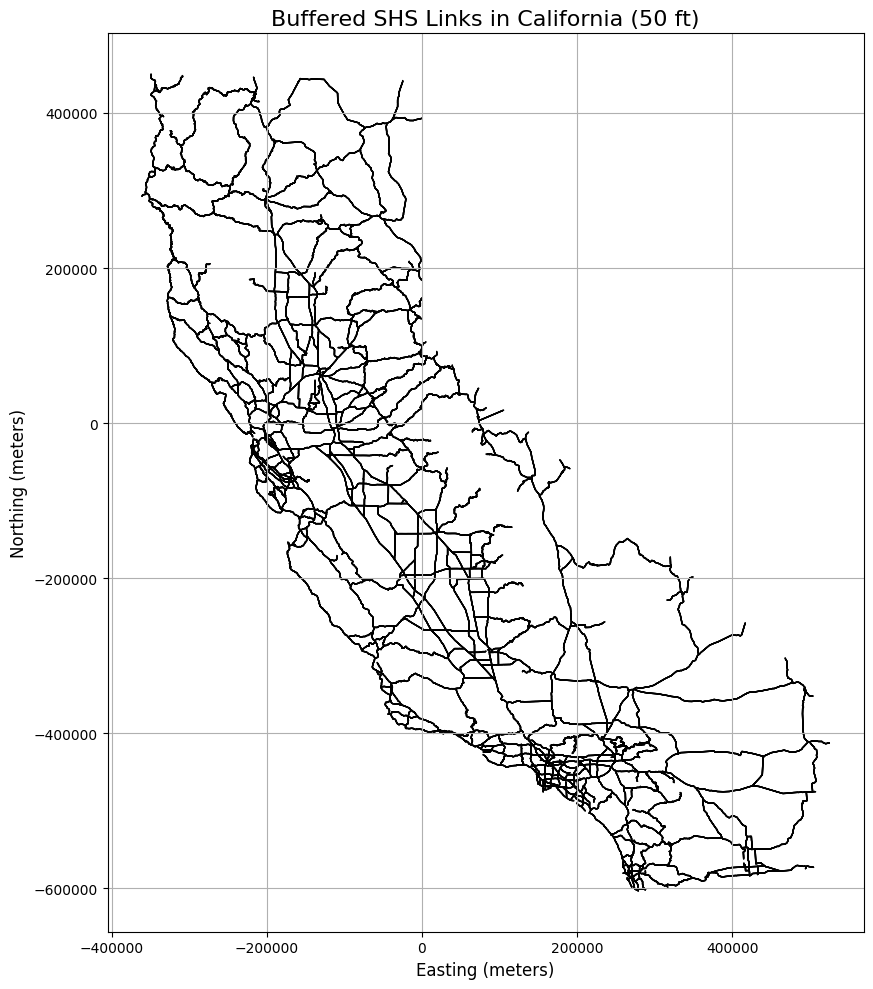

In [335]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame with specified color and edge
shs_proj.plot(ax=ax, color="lightblue", edgecolor="black", legend=True)

# Customize the plot with title and labels
ax.set_title("Buffered SHS Links in California (50 ft)", fontsize=16)
ax.set_xlabel("Easting (meters)", fontsize=12)
ax.set_ylabel("Northing (meters)", fontsize=12)

# Enable grid for better visual alignment
plt.grid(True)
plt.tight_layout()  # Adjust layout for readability

# Show plot
plt.show()

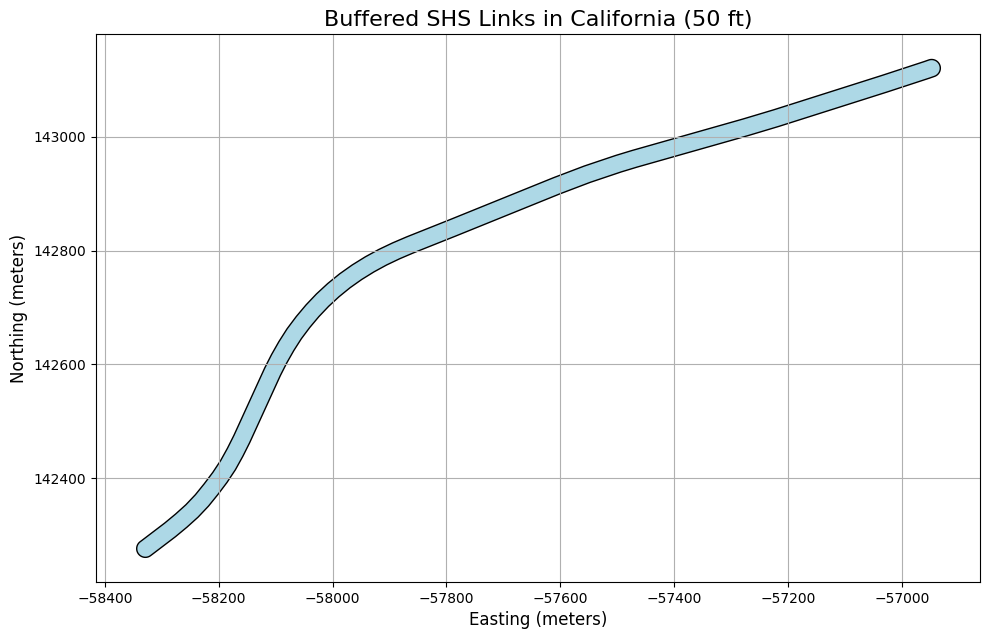

In [336]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame with specified color and edge
shs_proj[0:1].plot(ax=ax, color="lightblue", edgecolor="black", legend=True)

# Customize the plot with title and labels
ax.set_title("Buffered SHS Links in California (50 ft)", fontsize=16)
ax.set_xlabel("Easting (meters)", fontsize=12)
ax.set_ylabel("Northing (meters)", fontsize=12)

# Enable grid for better visual alignment
plt.grid(True)
plt.tight_layout()  # Adjust layout for readability

# Show plot
plt.show()

<Axes: >

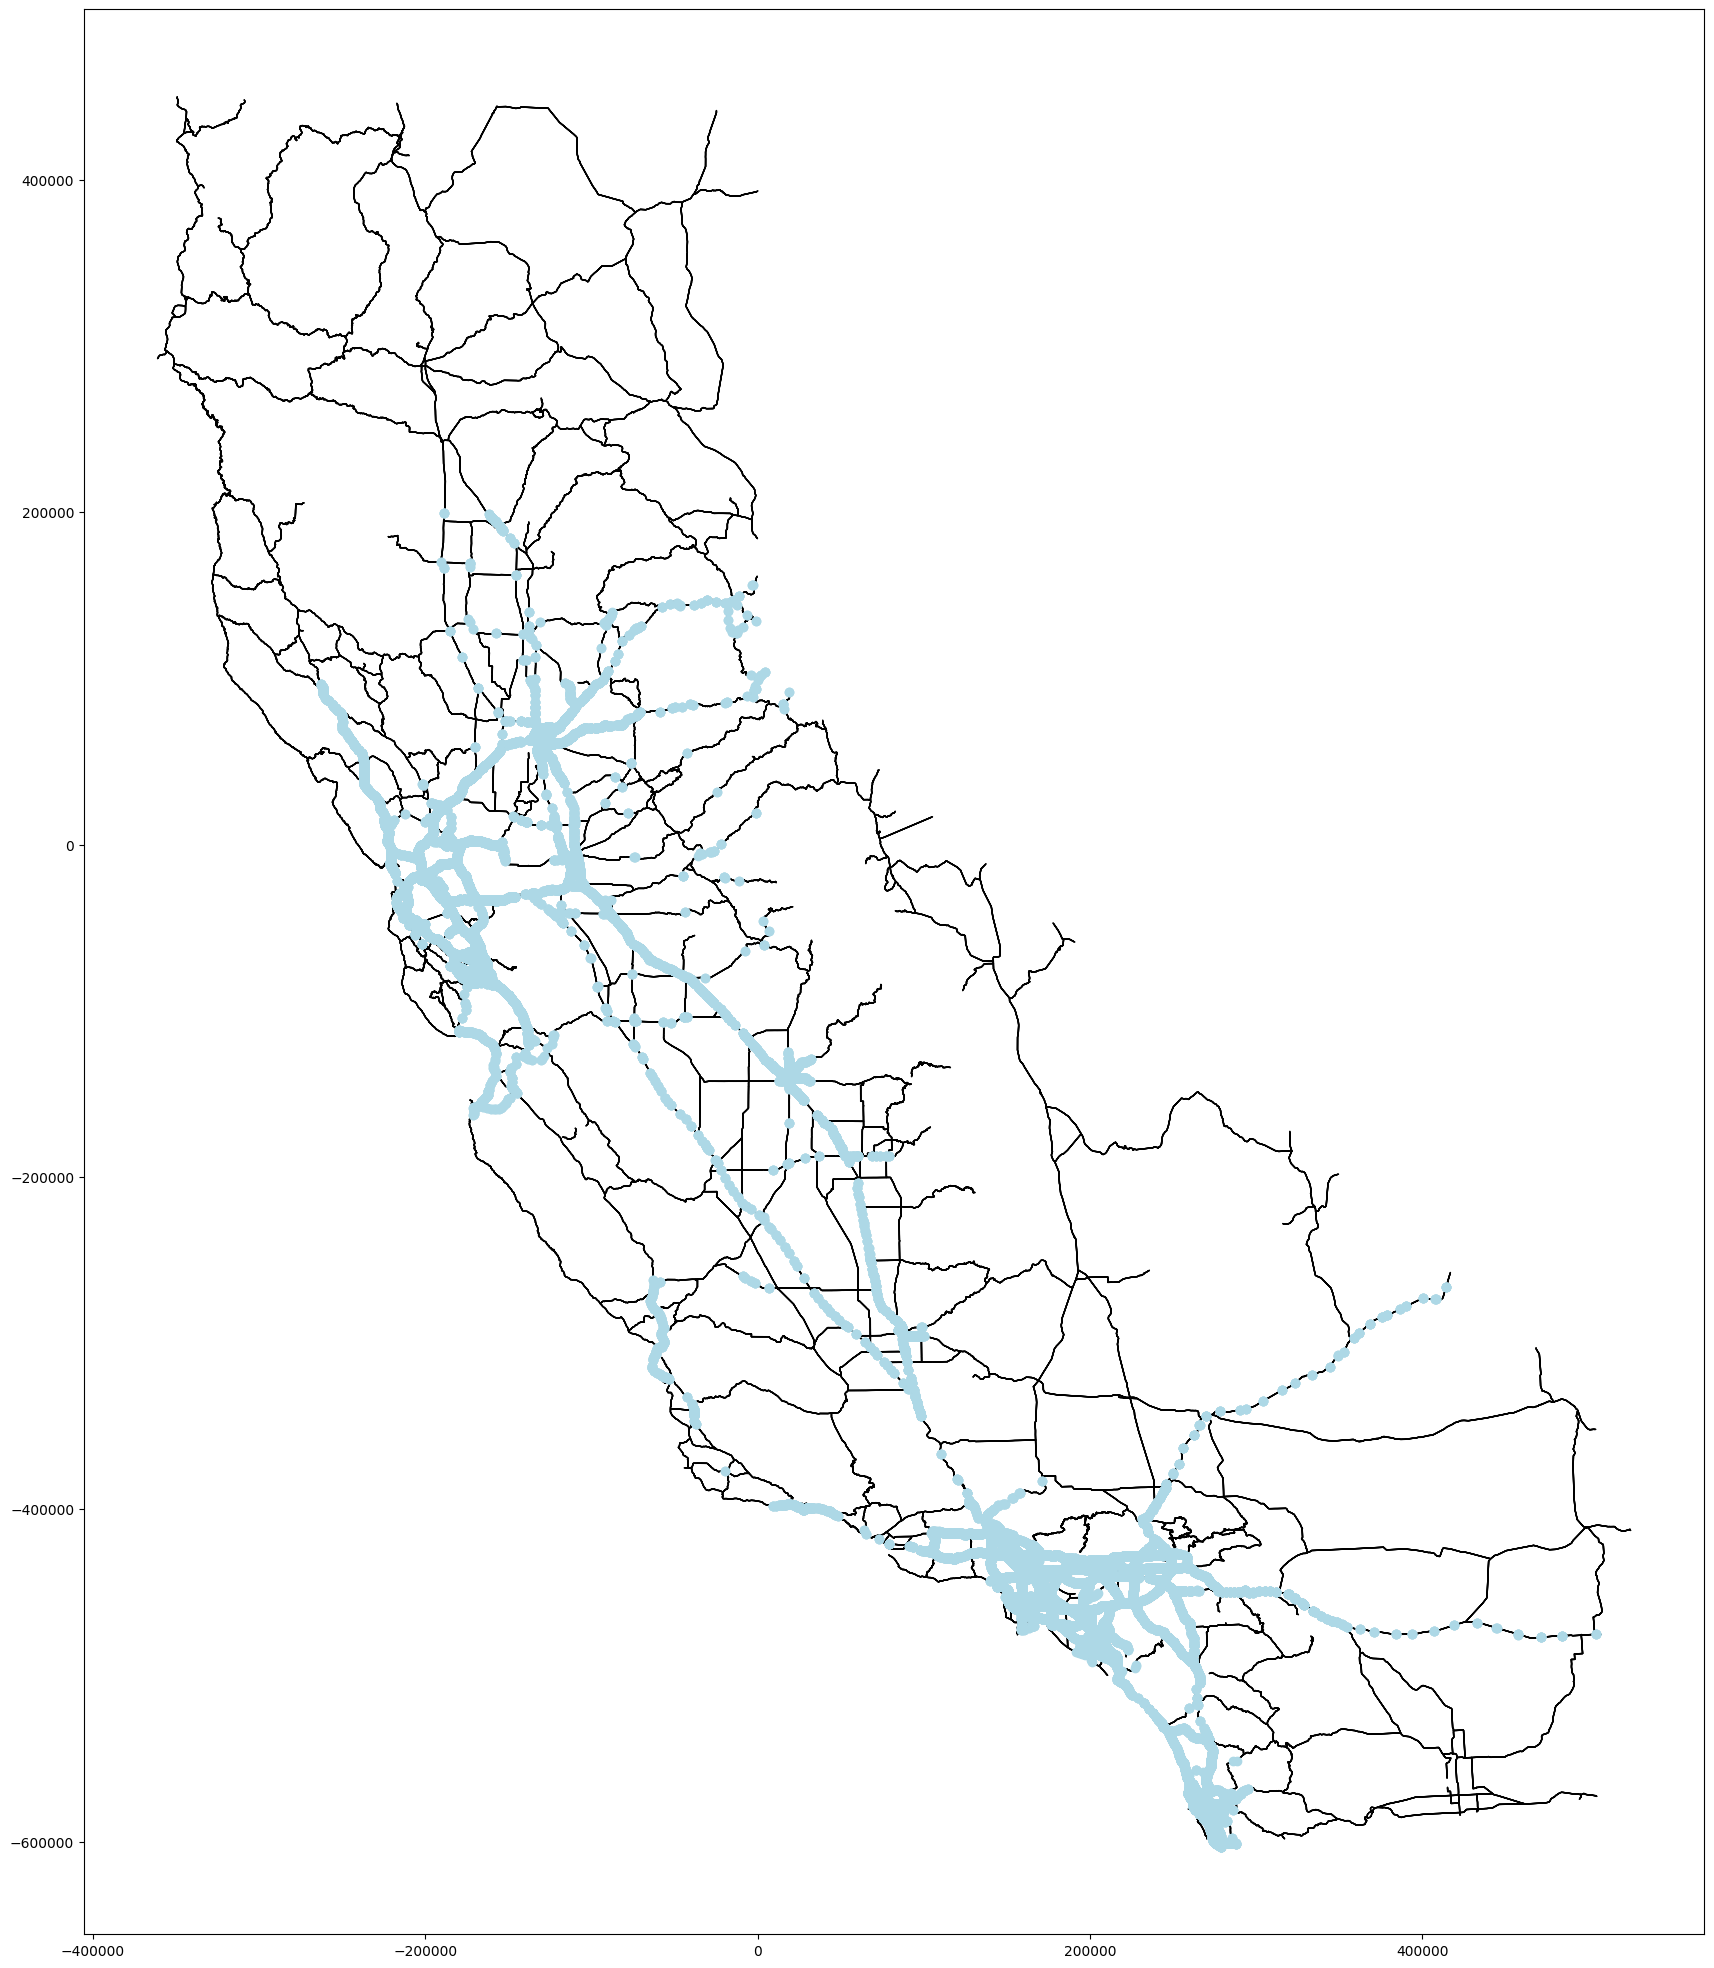

In [337]:
fig, ax = plt.subplots(figsize = (30,25)) 
shs_proj.plot(ax=ax,color="red",edgecolor='k',linewidth = 1)
pems_gdf_proj.plot(color="lightblue",ax=ax) #Use your second dataframe

In [338]:
#Now do the spatial join with aadt point data
shs_meta_data_joined = gpd.sjoin(pems_gdf_proj, shs_proj, predicate="within", how="inner")
# drop duplicates station id ue to buffer head overlap
shs_meta_data_joined=shs_meta_data_joined.drop_duplicates(['STATION_ID','DETECTOR_ID','STATION_TYPE','DETECTOR_TYPE','LANE','FREEWAY','DIRECTION','CITY', 'COUNTY','DISTRICT','ABSOLUTE_POSTMILE','PHYSICAL_LANES','STATE_POSTMILE'], keep='first')
shs_meta_data_joined.shape

(32780, 38)

In [339]:
shs_meta_data_joined.dtypes

DETECTOR_ID             int64
STATION_ID              int64
STATUS                  int64
LANE                    int64
DETECTOR_TYPE          object
STATION_TYPE           object
DISTRICT                int64
CITY                  float64
FREEWAY                 int64
DIRECTION              object
LENGTH                float64
STATE_POSTMILE         object
ABSOLUTE_POSTMILE     float64
LATITUDE              float64
LONGITUDE             float64
PHYSICAL_LANES          int64
COUNTY                 object
geometry             geometry
index_right             int64
OBJECTID                int32
Route                   int32
RteSuffix              object
RouteS                 object
PMRouteID              object
County                 object
District                int32
PMPrefix               object
bPM                   float64
ePM                   float64
PMSuffix               object
bPMc                   object
ePMc                   object
bOdometer             float64
eOdometer 

In [340]:
shs_proj.Direction.unique()

array(['WB', 'NB', 'SB', 'EB'], dtype=object)

In [341]:
pems_gdf_proj.DIRECTION.unique()

array(['NB', 'SB', 'WB', 'EB'], dtype=object)

In [342]:
# Now filter out more based on route, county, district, and PM prefix to avoid any mis match
def qc(shs_proj, pems_gdf_proj):
    # Check if the specified columns match between the two dataframes
    if (shs_proj['Route'] == pems_gdf_proj['FREEWAY'] and
        shs_proj['Direction'] == pems_gdf_proj['DIRECTION'] and
        shs_proj['District'] == pems_gdf_proj['DISTRICT']): #and
        #shs_proj['pmprefix'] == aadt_proj['PM_PFX']): # and
        #shs_proj['pmsuffix'] == aadt_proj['PM_SFX']):
        return True
    else:
        return False

In [343]:
# Apply the QC function to each row of the GeoDataFrame
shs_meta_data_joined['Qualified'] = shs_meta_data_joined.apply(lambda row: qc(row, row), axis=1)
shs_meta_data_joined.head()

,DETECTOR_ID,STATION_ID,STATUS,LANE,DETECTOR_TYPE,STATION_TYPE,DISTRICT,CITY,FREEWAY,DIRECTION,...,PMSuffix,bPMc,ePMc,bOdometer,eOdometer,AlignCode,RouteType,Direction,Shape_Length,Qualified
0,818494,818606,1,2,ML,ML,8,NaN,215,NB,...,,R27.525,R38.93,19.192,30.597,Right,Interstate,NB,0.171117,True
1,411445,402133,1,1,ML,ML,4,70098.0,101,NB,...,,1.673,22.131,467.839,488.297,Right,US,NB,0.315944,True
2,438210,407374,1,1,ML,ML,4,49670.0,85,SB,...,,R10.231,R24.059,10.407,24.235,Left,State,SB,0.218008,True
3,763328,763325,1,4,ML,ML,7,44000.0,10,WB,...,,R2.155,R14.089,0.000,11.934,Left,Interstate,WB,0.205444,True
4,440141,408911,1,4,ML,ML,4,NaN,880,SB,...,,0.0,10.502,0.000,10.502,Right,Interstate,NB,0.158565,False


In [344]:
shs_meta_data_joined.groupby(['Qualified'])['Qualified'].count()

Qualified
False     1789
True     30991
Name: Qualified, dtype: int64

In [345]:
# Lets consider only qualified count
qualified_count_segment=shs_meta_data_joined.loc[shs_meta_data_joined['Qualified']==True]
qualified_count_segment=qualified_count_segment.drop(['geometry'],axis=1)
qualified_count_segment.head()

,DETECTOR_ID,STATION_ID,STATUS,LANE,DETECTOR_TYPE,STATION_TYPE,DISTRICT,CITY,FREEWAY,DIRECTION,...,PMSuffix,bPMc,ePMc,bOdometer,eOdometer,AlignCode,RouteType,Direction,Shape_Length,Qualified
0,818494,818606,1,2,ML,ML,8,NaN,215,NB,...,,R27.525,R38.93,19.192,30.597,Right,Interstate,NB,0.171117,True
1,411445,402133,1,1,ML,ML,4,70098.0,101,NB,...,,1.673,22.131,467.839,488.297,Right,US,NB,0.315944,True
2,438210,407374,1,1,ML,ML,4,49670.0,85,SB,...,,R10.231,R24.059,10.407,24.235,Left,State,SB,0.218008,True
3,763328,763325,1,4,ML,ML,7,44000.0,10,WB,...,,R2.155,R14.089,0.000,11.934,Left,Interstate,WB,0.205444,True
5,440454,409724,1,2,ML,ML,4,70098.0,101,SB,...,,22.138,38.268,488.062,504.192,Left,US,SB,0.256384,True


In [346]:
qualified_count_segment.shape

(30991, 38)

In [347]:
# Now bring the shs segment geometry with the process file
shs_link=shs_proj_link
shs_link=shs_link.drop(['Route', 'RteSuffix', 'RouteS', 'PMRouteID', 'County',
       'District', 'PMPrefix', 'bPM', 'ePM', 'PMSuffix', 'bPMc', 'ePMc',
       'bOdometer', 'eOdometer', 'AlignCode', 'RouteType', 'Direction',
       'Shape_Length'],axis=1)
shs_link.head()

,OBJECTID,geometry
0,1,"MULTILINESTRING ((-58329.675 142277.358, -5832..."
1,2,"MULTILINESTRING ((-61268.303 140813.005, -6126..."
2,3,"MULTILINESTRING ((-64901.249 136251.945, -6490..."
3,4,"MULTILINESTRING ((-85592.441 111385.108, -8558..."
4,5,"MULTILINESTRING ((-112373.646 79179.862, -1122..."


In [348]:
shs_link.columns

Index(['OBJECTID', 'geometry'], dtype='object')

In [349]:
# add the segment geometry of the segment
shs_pems_meta_joined2=pd.merge(shs_link,qualified_count_segment, on=['OBJECTID'], how='inner')
shs_pems_meta_joined2.head()

,OBJECTID,geometry,DETECTOR_ID,STATION_ID,STATUS,LANE,DETECTOR_TYPE,STATION_TYPE,DISTRICT,CITY,...,PMSuffix,bPMc,ePMc,bOdometer,eOdometer,AlignCode,RouteType,Direction,Shape_Length,Qualified
0,1,"MULTILINESTRING ((-58329.675 142277.358, -5832...",319439,319444,1,2,ML,ML,3,NaN,...,,R55.008,R56.078,156.512,157.582,Left,Interstate,WB,0.018392,True
1,1,"MULTILINESTRING ((-58329.675 142277.358, -5832...",319438,319444,1,1,ML,ML,3,NaN,...,,R55.008,R56.078,156.512,157.582,Left,Interstate,WB,0.018392,True
2,4,"MULTILINESTRING ((-85592.441 111385.108, -8558...",30470817,3047084,1,1,ML,ML,3,NaN,...,,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,True
3,4,"MULTILINESTRING ((-85592.441 111385.108, -8558...",316258,316264,1,2,ML,ML,3,NaN,...,,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,True
4,4,"MULTILINESTRING ((-85592.441 111385.108, -8558...",30470401,3047041,1,1,ML,ML,3,NaN,...,,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,True


In [350]:
shs_pems_meta_joined2.OBJECTID.nunique()

959

In [351]:
# Count peMS detector for 1/10 mile
# count pems detector for each county, city, freeway, direction, type

In [352]:
# calculate the segment length
shs_pems_meta_joined2['Segment_length_mile']=shs_pems_meta_joined2['geometry'].length/1609.34
#shs_pems_meta_joined2['Segment_lane_length_mile']=shs_pems_meta_joined2['Segment_length_mile']* shs_pems_meta_joined2['PHYSICAL_LANES']
shs_pems_meta_joined2.head(10)

,OBJECTID,geometry,DETECTOR_ID,STATION_ID,STATUS,LANE,DETECTOR_TYPE,STATION_TYPE,DISTRICT,CITY,...,bPMc,ePMc,bOdometer,eOdometer,AlignCode,RouteType,Direction,Shape_Length,Qualified,Segment_length_mile
0,1,"MULTILINESTRING ((-58329.675 142277.358, -5832...",319439,319444,1,2,ML,ML,3,NaN,...,R55.008,R56.078,156.512,157.582,Left,Interstate,WB,0.018392,True,1.053200
1,1,"MULTILINESTRING ((-58329.675 142277.358, -5832...",319438,319444,1,1,ML,ML,3,NaN,...,R55.008,R56.078,156.512,157.582,Left,Interstate,WB,0.018392,True,1.053200
2,4,"MULTILINESTRING ((-85592.441 111385.108, -8558...",30470817,3047084,1,1,ML,ML,3,NaN,...,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,True,22.255522
3,4,"MULTILINESTRING ((-85592.441 111385.108, -8558...",316258,316264,1,2,ML,ML,3,NaN,...,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,True,22.255522
4,4,"MULTILINESTRING ((-85592.441 111385.108, -8558...",30470401,3047041,1,1,ML,ML,3,NaN,...,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,True,22.255522
5,4,"MULTILINESTRING ((-85592.441 111385.108, -8558...",34120501,3412051,1,1,ML,ML,3,NaN,...,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,True,22.255522
6,4,"MULTILINESTRING ((-85592.441 111385.108, -8558...",316257,316264,1,1,ML,ML,3,NaN,...,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,True,22.255522
7,4,"MULTILINESTRING ((-85592.441 111385.108, -8558...",313999,314001,1,2,ML,ML,3,14498.0,...,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,True,22.255522
8,4,"MULTILINESTRING ((-85592.441 111385.108, -8558...",30470902,3047091,1,2,ML,ML,3,NaN,...,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,True,22.255522
9,4,"MULTILINESTRING ((-85592.441 111385.108, -8558...",30470402,3047041,1,2,ML,ML,3,NaN,...,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,True,22.255522


In [353]:
shs_pems_meta_joined2.shape

(30991, 40)

In [354]:
# read addt for 2024 that is calculated based on 2023 data
aadt=pd.read_csv('2024_aadt.csv')
aadt1=aadt[['STATION_ID', 'STATION_TYPE','AADT_1']]
aadt1.rename(columns={'AADT_1':'AADT'},inplace=True)
# same station was located in two different counties, lets take a single average aadt
average_aadt = aadt1.groupby(['STATION_ID', 'STATION_TYPE'])['AADT'].mean().reset_index()
average_aadt['AADT_Thousands']=average_aadt['AADT']/1000
average_aadt.head()

/tmp/ipykernel_2380468/3713499218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aadt1.rename(columns={'AADT_1':'AADT'},inplace=True)


,STATION_ID,STATION_TYPE,AADT,AADT_Thousands
0,308511,ML,5146.972634,5.146973
1,308512,ML,10947.833333,10.947833
2,311903,ML,18420.606415,18.420606
3,312098,ML,11412.817396,11.412817
4,312132,ML,23461.254835,23.461255


In [355]:
shs_pems_meta_joined3=pd.merge(shs_pems_meta_joined2,average_aadt, on=['STATION_ID'], how='outer')

# Filter to match the shape of shs_pems_meta_joined2
shs_pems_meta_joined3 = shs_pems_meta_joined3.loc[
    shs_pems_meta_joined3['STATION_ID'].isin(shs_pems_meta_joined2['STATION_ID'])
]
shs_pems_meta_joined3.shape

(30992, 43)

In [356]:
# read detector status
detector_status=pd.read_csv('detector_yearly_status.csv')
detector_status1=detector_status[['STATION_ID','PCT_GOOD_DETECTOR']]
detector_status2 = detector_status1.groupby(['STATION_ID'])['PCT_GOOD_DETECTOR'].mean().reset_index()
detector_status2.head()

,STATION_ID,PCT_GOOD_DETECTOR
0,308511,80.1370
1,308512,0.2740
2,311903,29.6804
3,311974,0.0000
4,312010,26.4110


In [357]:
detector_status2['PCT_GOOD_DETECTOR'].describe()

count    12507.000000
mean        53.500721
std         39.558618
min          0.000000
25%          0.000000
50%         65.388100
75%         93.972600
max        100.000000
Name: PCT_GOOD_DETECTOR, dtype: float64

In [358]:
detector_status2.shape

(12507, 2)

In [359]:
shs_pems_meta_joined4=pd.merge(shs_pems_meta_joined3,detector_status2, on=['STATION_ID'], how='outer')

# Filter to match the shape of shs_pems_meta_joined2
shs_pems_meta_joined5 = shs_pems_meta_joined4.loc[
    shs_pems_meta_joined4['STATION_ID'].isin(shs_pems_meta_joined2['STATION_ID'])
]
shs_pems_meta_joined5.head()

,OBJECTID,geometry,DETECTOR_ID,STATION_ID,STATUS,LANE,DETECTOR_TYPE,STATION_TYPE_x,DISTRICT,CITY,...,AlignCode,RouteType,Direction,Shape_Length,Qualified,Segment_length_mile,STATION_TYPE_y,AADT,AADT_Thousands,PCT_GOOD_DETECTOR
0,1.0,"MULTILINESTRING ((-58329.675 142277.358, -5832...",319439.0,319444,1.0,2.0,ML,ML,3.0,NaN,...,Left,Interstate,WB,0.018392,True,1.053200,ML,14216.220188,14.216220,NaN
1,1.0,"MULTILINESTRING ((-58329.675 142277.358, -5832...",319438.0,319444,1.0,1.0,ML,ML,3.0,NaN,...,Left,Interstate,WB,0.018392,True,1.053200,ML,14216.220188,14.216220,NaN
2,4.0,"MULTILINESTRING ((-85592.441 111385.108, -8558...",30470817.0,3047084,1.0,1.0,ML,ML,3.0,NaN,...,Left,Interstate,WB,0.362514,True,22.255522,ML,13712.286230,13.712286,58.9041
3,4.0,"MULTILINESTRING ((-85592.441 111385.108, -8558...",30470818.0,3047084,1.0,2.0,ML,ML,3.0,NaN,...,Left,Interstate,WB,0.362514,True,22.255522,ML,13712.286230,13.712286,58.9041
4,4.0,"MULTILINESTRING ((-85592.441 111385.108, -8558...",316258.0,316264,1.0,2.0,ML,ML,3.0,NaN,...,Left,Interstate,WB,0.362514,True,22.255522,ML,14496.459961,14.496460,92.1918


In [360]:
shs_pems_meta_joined5.shape

(30992, 44)

In [361]:
# Group by the specified columns and apply count for DETECTOR_ID and mean for Segment_length_mile
link_detetor_count = shs_pems_meta_joined5.groupby(
    ['OBJECTID', 'geometry', 'County',
       'District', 'Route','Direction']
).agg(
    DETECTOR_ID_count=('DETECTOR_ID', 'count'),        # Count of DETECTOR_ID
    Segment_length_mile_avg=('Segment_length_mile', 'mean'),
    Segment_aadt_avg=('AADT_Thousands', 'mean'),
    Segment_status_avg=('PCT_GOOD_DETECTOR', 'mean'),
    Physical_lane= ('PHYSICAL_LANES', 'mean')# Average of Segment_length_mile
).reset_index()
link_detetor_count['Segment_lane_length_mile']=link_detetor_count['Segment_length_mile_avg']* link_detetor_count['Physical_lane']
# Display the result
link_detetor_count.head()

,OBJECTID,geometry,County,District,Route,Direction,DETECTOR_ID_count,Segment_length_mile_avg,Segment_aadt_avg,Segment_status_avg,Physical_lane,Segment_lane_length_mile
0,1.0,"MULTILINESTRING ((-58329.675 142277.358, -5832...",Placer,3.0,80.0,WB,2,1.053200,14.216220,NaN,2.000000,2.106401
1,4.0,"MULTILINESTRING ((-85592.441 111385.108, -8558...",Placer,3.0,80.0,WB,14,22.255522,14.090643,76.877000,2.000000,44.511043
2,5.0,"MULTILINESTRING ((-112373.646 79179.862, -1122...",Placer,3.0,80.0,WB,86,18.834001,50.165451,79.241399,3.093023,58.254004
3,6.0,"MULTILINESTRING ((-119090.325 71542.03, -11892...",Sacramento,3.0,80.0,WB,80,6.320448,70.814973,68.569807,3.825000,24.175712
4,7.0,"MULTILINESTRING ((-120221.517 70820.356, -1200...",Sacramento,3.0,80.0,WB,11,0.874809,44.952307,58.002618,3.000000,2.624427


In [362]:
link_detetor_count['Segment_status_avg'].describe()

count    946.000000
mean      58.091182
std       31.212750
min        0.000000
25%       38.113887
50%       62.668796
75%       85.989370
max       99.726000
Name: Segment_status_avg, dtype: float64

In [363]:
link_detetor_count.shape

(954, 12)

In [364]:
#Aggregate on highway segments, find out the ratio of number of detectors over length of the segments. 
link_detetor_count['detector_desity_per_lane_mile']=link_detetor_count['DETECTOR_ID_count']/link_detetor_count['Segment_lane_length_mile']
#Aggregate on highway segments, find out the ratio of number of detectors over average AADTs along the segments. 
link_detetor_count['detector_desity_per_1000_AADT']=link_detetor_count['DETECTOR_ID_count']/link_detetor_count['Segment_aadt_avg']
#Aggregate on highway segments, find out the ratio of number of detectors over average AADT * length of the segments
link_detetor_count['detector_density_per_lane_length_mile_1000_AADT']=link_detetor_count['DETECTOR_ID_count']/(link_detetor_count['Segment_lane_length_mile']*link_detetor_count['Segment_aadt_avg'])
link_detetor_count.head()

,OBJECTID,geometry,County,District,Route,Direction,DETECTOR_ID_count,Segment_length_mile_avg,Segment_aadt_avg,Segment_status_avg,Physical_lane,Segment_lane_length_mile,detector_desity_per_lane_mile,detector_desity_per_1000_AADT,detector_density_per_lane_length_mile_1000_AADT
0,1.0,"MULTILINESTRING ((-58329.675 142277.358, -5832...",Placer,3.0,80.0,WB,2,1.053200,14.216220,NaN,2.000000,2.106401,0.949487,0.140684,0.066789
1,4.0,"MULTILINESTRING ((-85592.441 111385.108, -8558...",Placer,3.0,80.0,WB,14,22.255522,14.090643,76.877000,2.000000,44.511043,0.314529,0.993567,0.022322
2,5.0,"MULTILINESTRING ((-112373.646 79179.862, -1122...",Placer,3.0,80.0,WB,86,18.834001,50.165451,79.241399,3.093023,58.254004,1.476293,1.714327,0.029428
3,6.0,"MULTILINESTRING ((-119090.325 71542.03, -11892...",Sacramento,3.0,80.0,WB,80,6.320448,70.814973,68.569807,3.825000,24.175712,3.309106,1.129705,0.046729
4,7.0,"MULTILINESTRING ((-120221.517 70820.356, -1200...",Sacramento,3.0,80.0,WB,11,0.874809,44.952307,58.002618,3.000000,2.624427,4.191391,0.244704,0.093241


In [365]:
link_detetor_count.columns

Index(['OBJECTID', 'geometry', 'County', 'District', 'Route', 'Direction',
       'DETECTOR_ID_count', 'Segment_length_mile_avg', 'Segment_aadt_avg',
       'Segment_status_avg', 'Physical_lane', 'Segment_lane_length_mile',
       'detector_desity_per_lane_mile', 'detector_desity_per_1000_AADT',
       'detector_density_per_lane_length_mile_1000_AADT'],
      dtype='object')

In [366]:
# Find the links that do not have any PeMS counter installed
shs_without_pems = shs_proj_link[~shs_proj_link['OBJECTID'].isin(link_detetor_count['OBJECTID'])]
shs_without_pems=shs_without_pems[['OBJECTID', 'geometry', 'County',
       'District', 'Route','Direction']]
shs_without_pems['DETECTOR_ID_count']=0
shs_without_pems['Segment_lane_length_mile']='unknown'
shs_without_pems['detector_desity_per_lane_mile']=0
shs_without_pems['detector_desity_per_1000_AADT']=0
shs_without_pems['detector_density_per_lane_length_mile_1000_AADT']=0
shs_without_pems['Segment_status_avg']=0
shs_without_pems['Physical_lane']='unknown'
shs_without_pems['County'] = shs_without_pems['County'].map(county_full_names)
shs_without_pems.head()


,OBJECTID,geometry,County,District,Route,Direction,DETECTOR_ID_count,Segment_lane_length_mile,detector_desity_per_lane_mile,detector_desity_per_1000_AADT,detector_density_per_lane_length_mile_1000_AADT,Segment_status_avg,Physical_lane
1,2,"MULTILINESTRING ((-61268.303 140813.005, -6126...",Placer,3,80,WB,0,unknown,0,0,0,0,unknown
2,3,"MULTILINESTRING ((-64901.249 136251.945, -6490...",Placer,3,80,WB,0,unknown,0,0,0,0,unknown
18,19,"MULTILINESTRING ((-211010.247 -23581.876, -210...",San Francisco,4,80,WB,0,unknown,0,0,0,0,unknown
19,20,"MULTILINESTRING ((277927.225 -456098.363, 2779...",Riverside,8,79,NB,0,unknown,0,0,0,0,unknown
20,21,"MULTILINESTRING ((277282.31 -458905.873, 27728...",Riverside,8,79,NB,0,unknown,0,0,0,0,unknown


In [367]:
# Now join two data frame that have link level density
shs_link_pems_sensor_density=pd.concat([link_detetor_count,shs_without_pems],axis=0)
shs_link_pems_sensor_density.head()

,OBJECTID,geometry,County,District,Route,Direction,DETECTOR_ID_count,Segment_length_mile_avg,Segment_aadt_avg,Segment_status_avg,Physical_lane,Segment_lane_length_mile,detector_desity_per_lane_mile,detector_desity_per_1000_AADT,detector_density_per_lane_length_mile_1000_AADT
0,1.0,"MULTILINESTRING ((-58329.675 142277.358, -5832...",Placer,3.0,80.0,WB,2,1.053200,14.216220,NaN,2.0,2.106401,0.949487,0.140684,0.066789
1,4.0,"MULTILINESTRING ((-85592.441 111385.108, -8558...",Placer,3.0,80.0,WB,14,22.255522,14.090643,76.877000,2.0,44.511043,0.314529,0.993567,0.022322
2,5.0,"MULTILINESTRING ((-112373.646 79179.862, -1122...",Placer,3.0,80.0,WB,86,18.834001,50.165451,79.241399,3.093023,58.254004,1.476293,1.714327,0.029428
3,6.0,"MULTILINESTRING ((-119090.325 71542.03, -11892...",Sacramento,3.0,80.0,WB,80,6.320448,70.814973,68.569807,3.825,24.175712,3.309106,1.129705,0.046729
4,7.0,"MULTILINESTRING ((-120221.517 70820.356, -1200...",Sacramento,3.0,80.0,WB,11,0.874809,44.952307,58.002618,3.0,2.624427,4.191391,0.244704,0.093241


In [368]:
shs_link_pems_sensor_density.shape

(5238, 15)

In [369]:
shs_link_pems_sensor_density.District.unique()

array([ 3.,  4., 11., 12.,  8.,  7.,  5.,  6., 10.,  2.,  9.,  1.])

In [370]:
shs_link_pems_sensor_density.Route.nunique()

242

In [371]:
shs_proj_link['segment_length_mile']=shs_proj_link['geometry'].length/1609.34
shs_proj_link.head()

,OBJECTID,Route,RteSuffix,RouteS,PMRouteID,County,District,PMPrefix,bPM,ePM,...,bPMc,ePMc,bOdometer,eOdometer,AlignCode,RouteType,Direction,Shape_Length,geometry,segment_length_mile
0,1,80,,80,PLA080.R.L,PLA,3,R,55.008,56.078,...,R55.008,R56.078,156.512,157.582,Left,Interstate,WB,0.018392,"MULTILINESTRING ((-58329.675 142277.358, -5832...",1.053200
1,2,80,,80,PLA080...L,PLA,3,,52.947,55.008,...,52.947,55.008,154.451,156.512,Left,Interstate,WB,0.036842,"MULTILINESTRING ((-61268.303 140813.005, -6126...",2.067336
2,3,80,,80,PLA080..LL,PLA,3,,49.180,52.947,...,49.18L,52.947L,150.684,154.451,Left Independent,Interstate,WB,0.060406,"MULTILINESTRING ((-64901.249 136251.945, -6490...",3.723571
3,4,80,,80,PLA080...L,PLA,3,,26.920,49.180,...,26.92,49.18,128.424,150.684,Left,Interstate,WB,0.362514,"MULTILINESTRING ((-85592.441 111385.108, -8558...",22.255522
4,5,80,,80,PLA080...L,PLA,3,,0.000,18.822,...,0.0,18.822,101.519,120.341,Left,Interstate,WB,0.310451,"MULTILINESTRING ((-112373.646 79179.862, -1122...",18.834001


In [372]:
# # Step 1: Define the boundary and filter for state highways with lanes information
# # Download data for California highways
# california_highways = ox.geometries_from_place("California, USA", tags={'highway': True})

# # Step 2: Filter for state highways specifically using 'ref' tag for 'CA' routes and lanes
# state_highways = california_highways[
#     california_highways['ref'].str.contains("CA", na=False) &  # Matches state highway reference
#     california_highways['lanes'].notna()  # Ensure there's lane information
# ]

# # Step 3: Display relevant columns to confirm the data
# print(state_highways[['ref', 'lanes', 'highway', 'geometry']].head())

# # Step 4: Optional - Convert lanes column to integer for analysis
# state_highways['lanes'] = pd.to_numeric(state_highways['lanes'], errors='coerce').fillna(0).astype(int)

# # Step 5: Plot the state highways by lane count
# plt.figure(figsize=(12, 8))
# state_highways.plot(column='lanes', cmap='viridis', legend=True)
# plt.title("California State Highways with Lane Information")
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.show()

In [373]:
# Calculate the sum of segment length for each district
district_segment_length_sum = shs_proj_link.groupby(
    ['District']
).agg(Segment_length_mile_sum=('segment_length_mile', 'sum')
).reset_index()
# Display the result
district_segment_length_sum

,District,Segment_length_mile_sum
0,1,1893.681517
1,2,3454.278472
2,3,2973.572982
3,4,2801.687721
4,5,2303.087542
5,6,3586.468152
6,7,2226.656398
7,8,3649.398404
8,9,1918.023394
9,10,2652.678679


In [374]:
# Calculate the detector for each district
district_detector_count = pems_gdf_proj.groupby(
    ['DISTRICT']
).agg(detector_count=('DETECTOR_ID', 'count')
).reset_index()
# Display the result
district_detector_count

,DISTRICT,detector_count
0,3,2594
1,4,9292
2,5,905
3,6,1764
4,7,6568
5,8,4265
6,10,1900
7,11,3021
8,12,3300


In [375]:
# merge the detector count and segment length by district
detetor_density_by_district=pd.merge(district_detector_count,district_segment_length_sum, left_on=['DISTRICT'], right_on=['District'], how='outer')
detetor_density_by_district['detector_density_by_district']=detetor_density_by_district['detector_count']/detetor_density_by_district['Segment_length_mile_sum']
detetor_density_by_district['detector_density_by_district']=detetor_density_by_district['detector_density_by_district'].fillna(0)
detetor_density_by_district

,DISTRICT,detector_count,District,Segment_length_mile_sum,detector_density_by_district
0,3.0,2594.0,3,2973.572982,0.872351
1,4.0,9292.0,4,2801.687721,3.316572
2,5.0,905.0,5,2303.087542,0.392951
3,6.0,1764.0,6,3586.468152,0.491849
4,7.0,6568.0,7,2226.656398,2.949714
5,8.0,4265.0,8,3649.398404,1.168686
6,10.0,1900.0,10,2652.678679,0.716257
7,11.0,3021.0,11,2087.724384,1.447030
8,12.0,3300.0,12,552.393293,5.974004
9,NaN,NaN,1,1893.681517,0.000000


In [376]:
# Lets get unique county and district
county_district=shs_link_pems_sensor_density[['County','District']].drop_duplicates(subset=['County','District'], keep='first')
county_district.head()

,County,District
0,Placer,3.0
3,Sacramento,3.0
5,Yolo,3.0
6,Solano,4.0
11,Napa,4.0


In [377]:
# read the population
pop=pd.read_csv('/mnt/mdp/Jupyter/Dev_Mintu/PeMS_Coverage/CA_Popluation.csv')
pop['Pop_in_Thousands']=pop['Population']/1000
# Clean and standardize 'County' column
county_district['County'] = county_district['County'].str.strip().str.lower()
pop['County'] = pop['County'].str.strip().str.lower()

# Merge again
pop_dist_cty = pd.merge(county_district, pop, on='County', how='inner')
pop_dist_cty['County'] = pop_dist_cty['County'].str.title()
#pop_dist_cty['Total_Population_By_District'] = pop_dist_cty.groupby('District')['Pop_in_Thousands'].transform('sum')
population_by_district = pop_dist_cty.groupby('District')[['Pop_in_Thousands']].sum().reset_index()
population_by_district

,District,Pop_in_Thousands
0,1.0,315.328
1,2.0,355.832
2,3.0,2949.114
3,4.0,7626.372
4,5.0,1231.039
5,6.0,2709.227
6,7.0,10609.345
7,8.0,4621.977
8,9.0,936.301
9,10.0,1773.756


In [378]:
detetor_density_by_district_pop=pd.merge(detetor_density_by_district,population_by_district, on=['District'], how='inner')
detetor_density_by_district_pop['detector_density_by_pop']=detetor_density_by_district_pop['detector_count']/detetor_density_by_district_pop['Pop_in_Thousands']
detetor_density_by_district_pop

,DISTRICT,detector_count,District,Segment_length_mile_sum,detector_density_by_district,Pop_in_Thousands,detector_density_by_pop
0,3.0,2594.0,3,2973.572982,0.872351,2949.114,0.879586
1,4.0,9292.0,4,2801.687721,3.316572,7626.372,1.218404
2,5.0,905.0,5,2303.087542,0.392951,1231.039,0.735151
3,6.0,1764.0,6,3586.468152,0.491849,2709.227,0.651108
4,7.0,6568.0,7,2226.656398,2.949714,10609.345,0.619077
5,8.0,4265.0,8,3649.398404,1.168686,4621.977,0.922765
6,10.0,1900.0,10,2652.678679,0.716257,1773.756,1.071173
7,11.0,3021.0,11,2087.724384,1.447030,3491.778,0.865175
8,12.0,3300.0,12,552.393293,5.974004,3142.387,1.050157
9,NaN,NaN,1,1893.681517,0.000000,315.328,NaN


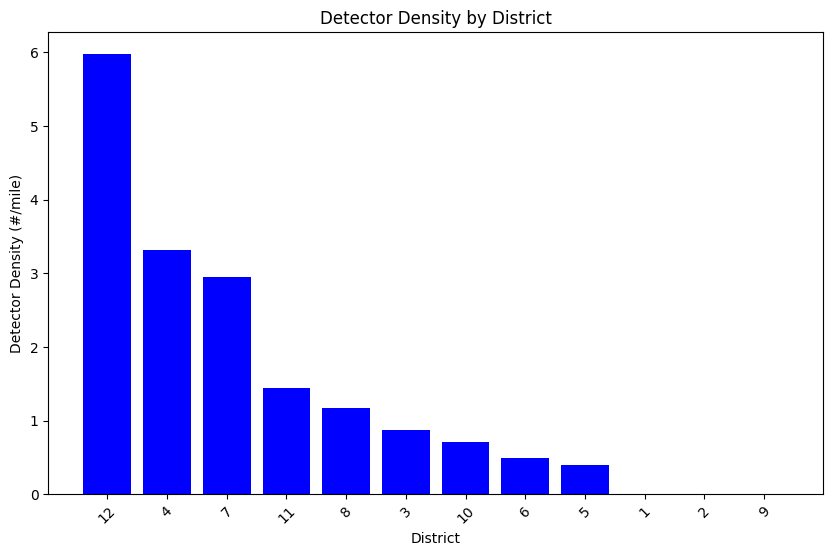

In [379]:
# Sort by 'detector_density_by_district' in descending order
detetor_density_by_district_sort =detetor_density_by_district_pop.sort_values(by='detector_density_by_district', ascending=False)

# Convert 'DISTRICT' to a categorical type with the specific order
detetor_density_by_district_sort['District'] = detetor_density_by_district_sort['District'].astype(str)
detetor_density_by_district_sort['District'] = pd.Categorical(detetor_density_by_district_sort['District'], 
                                                               categories=detetor_density_by_district_sort['District'], 
                                                               ordered=True)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(detetor_density_by_district_sort['District'], detetor_density_by_district_sort['detector_density_by_district'], color='blue')
plt.xlabel("District")
plt.ylabel("Detector Density (#/mile)")
plt.title("Detector Density by District")
plt.xticks(rotation=45)
plt.show()

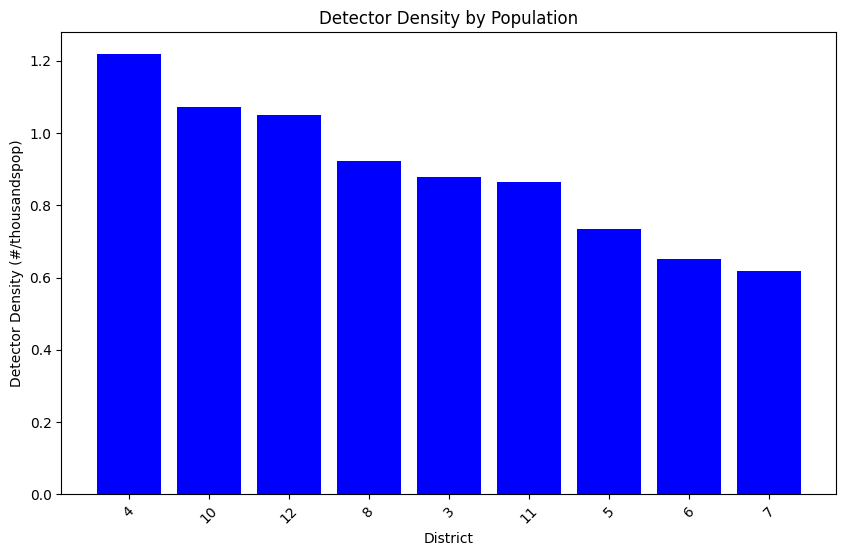

In [380]:
# Sort by 'detector_density_by_pop' in descending order
shs_link_dist_cty_rte_pop_den_sort = detetor_density_by_district_pop.sort_values(by='detector_density_by_pop', ascending=False)

# Convert 'District' to a categorical type with a specific order
shs_link_dist_cty_rte_pop_den_sort['District'] = shs_link_dist_cty_rte_pop_den_sort['District'].astype(str)
shs_link_dist_cty_rte_pop_den_sort['District'] = pd.Categorical(
    shs_link_dist_cty_rte_pop_den_sort['District'],
    categories=shs_link_dist_cty_rte_pop_den_sort['District'].unique(),  # Use unique categories
    ordered=True
)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(
    shs_link_dist_cty_rte_pop_den_sort['District'],
    shs_link_dist_cty_rte_pop_den_sort['detector_density_by_pop'],
    color='blue'
)
plt.xlabel("District")
plt.ylabel("Detector Density (#/thousandspop)")
plt.title("Detector Density by Population")
plt.xticks(rotation=45)
plt.show()

In [381]:
# Calculate the sum of segment length for each county
county_segment_length_sum = shs_proj_link.groupby(
    ['County']
).agg(Segment_length_mile_sum=('segment_length_mile', 'sum')
).reset_index()
# Display the result
county_segment_length_sum['County'] = county_segment_length_sum['County'].map(county_full_names)
county_segment_length_sum.head()

,County,Segment_length_mile_sum
0,Alameda,391.546407
1,Alpine,165.426202
2,Amador,250.962634
3,Butte,362.711119
4,Calaveras,299.504845


In [382]:
# Calculate the detector for each district
county_detector_count = pems_gdf_proj.groupby(
    ['COUNTY']
).agg(detector_count=('DETECTOR_ID', 'count')
).reset_index()
# Display the result
county_detector_count['County'] = county_detector_count['COUNTY'].str.title()
county_detector_count=county_detector_count.drop(['COUNTY'],axis=1)
county_detector_count.head()

,detector_count,County
0,2288,Alameda
1,9,Alpine
2,21,Amador
3,74,Butte
4,6,Calaveras


In [383]:
# Calculate the detector density by counmty
detetor_density_by_county=pd.merge(county_detector_count,county_segment_length_sum, on=['County'], how='outer')
detetor_density_by_county['detector_density_by_county']=detetor_density_by_county['detector_count']/detetor_density_by_county['Segment_length_mile_sum']
detetor_density_by_county['detector_density_by_county']=detetor_density_by_county['detector_density_by_county'].fillna(0)
detetor_density_by_county = detetor_density_by_county.dropna(subset=['County'])
detetor_density_by_county.head()

,detector_count,County,Segment_length_mile_sum,detector_density_by_county
0,2288.0,Alameda,391.546407,5.843496
1,9.0,Alpine,165.426202,0.054405
2,21.0,Amador,250.962634,0.083678
3,74.0,Butte,362.711119,0.204019
4,6.0,Calaveras,299.504845,0.020033


In [384]:
detetor_density_by_county.County.isna().sum()

0

In [385]:
detetor_density_by_county.shape

(58, 4)

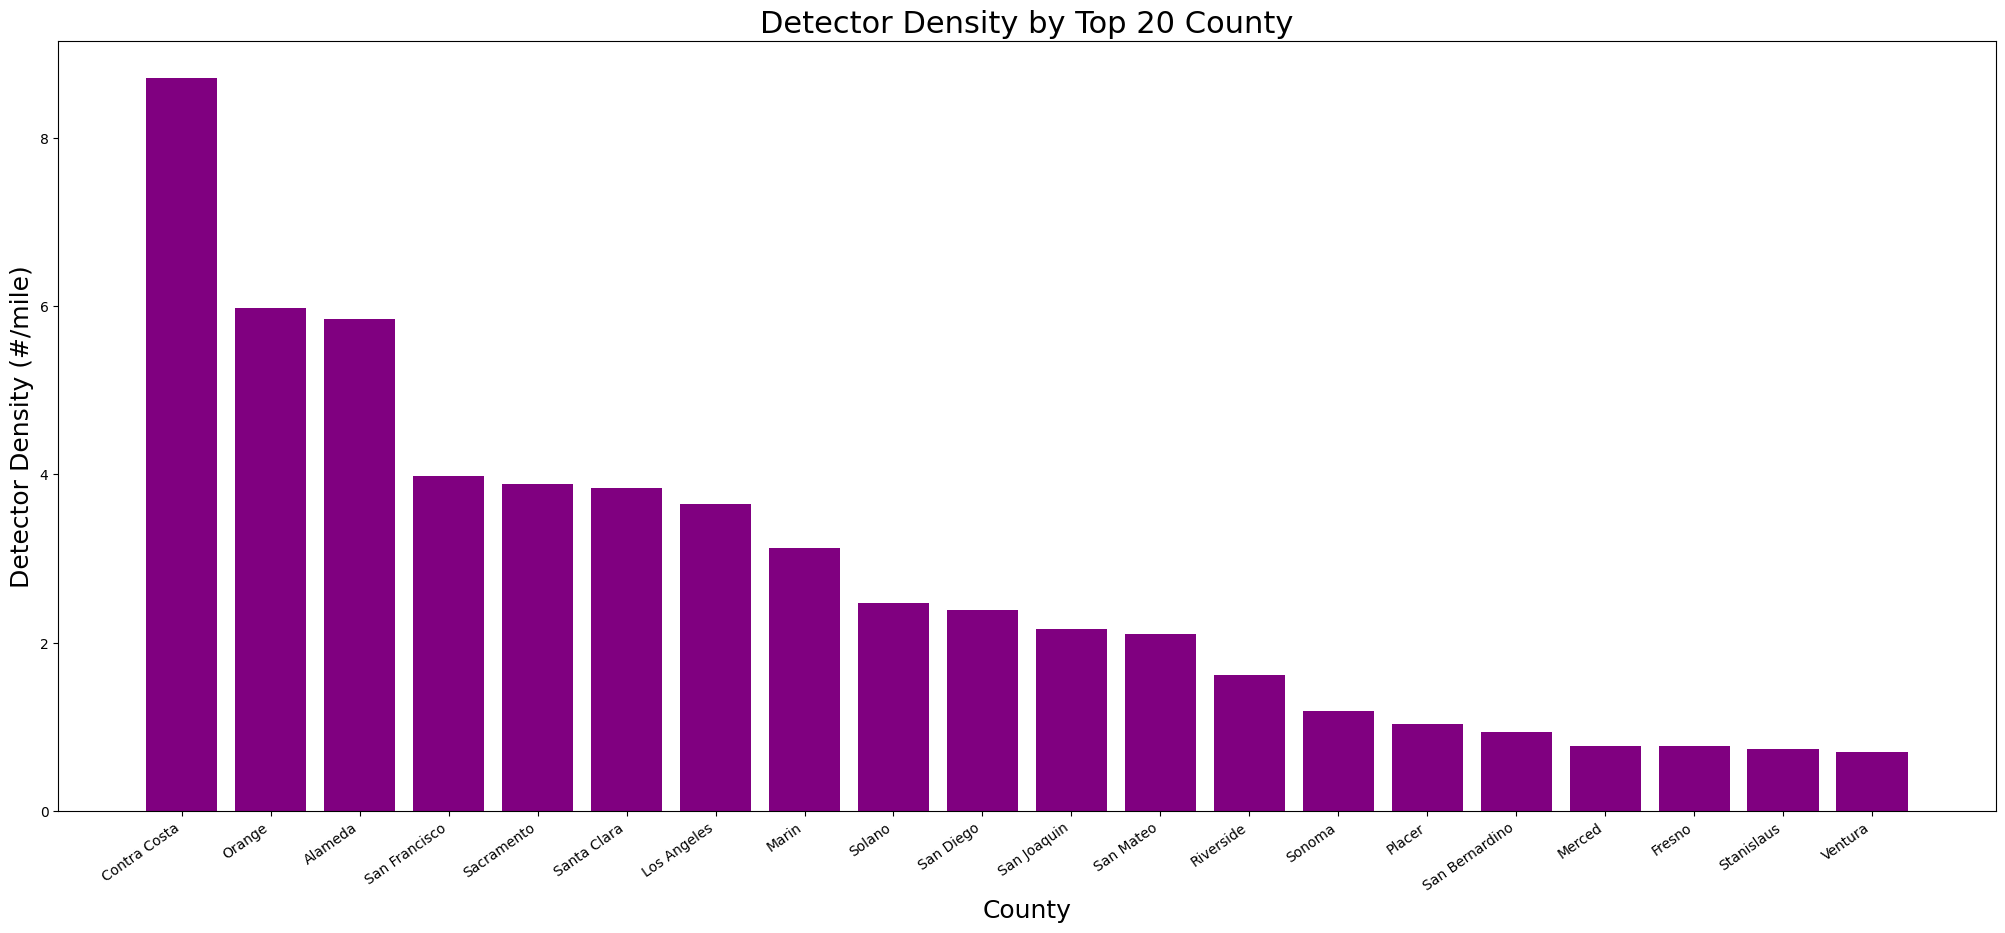

In [386]:
# Sorting the data in descending order
detetor_density_by_county_sorted = detetor_density_by_county.sort_values(by='detector_density_by_county', ascending=False).head(20)

# Plotting the bar chart
plt.figure(figsize=(25, 10))
plt.bar(detetor_density_by_county_sorted['County'], detetor_density_by_county_sorted['detector_density_by_county'], color='purple')
plt.xlabel("County",fontsize=18)
plt.ylabel("Detector Density (#/mile)",fontsize=18)
plt.title("Detector Density by Top 20 County",fontsize=22)

# Adjust x-axis label rotation and alignment
plt.xticks(rotation=35, ha='right')

plt.show()

In [387]:
# Calculate the sum of segment length for each route
route_segment_length_sum = shs_proj_link.groupby(
    ['Route']
).agg(Segment_length_mile_sum=('segment_length_mile', 'sum')
).reset_index()
# Display the result
route_segment_length_sum.head()

,Route,Segment_length_mile_sum
0,1,1278.660233
1,2,156.742871
2,3,291.864636
3,4,379.972849
4,5,1598.920429


In [388]:
route_segment_length_sum.Route.nunique()

242

In [389]:
route_segment_length_sum.Route.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  20,  22,  23,  24,  25,  26,  27,  28,
        29,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  43,  44,
        45,  46,  47,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  65,  66,  67,  68,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  94,  95,  96,  97,  98,  99, 101, 103,
       104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118,
       119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 142, 144, 145, 146, 147,
       149, 150, 151, 152, 153, 154, 155, 156, 158, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 177, 178,
       180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       197, 198, 199, 200, 201, 202, 203, 204, 205, 207, 210, 21

In [390]:
# Calculate DETECTOR FOR EACH ROUTE
route_detector_count = pems_gdf_proj.groupby(['FREEWAY']).agg(detector_count=('DETECTOR_ID', 'count')
).reset_index()
# Display the result
route_detector_count.head()

,FREEWAY,detector_count
0,1,268
1,2,78
2,4,590
3,5,3433
4,8,322


In [391]:
# Calculate the detector density by route
detetor_density_by_route=pd.merge(route_segment_length_sum,route_detector_count, left_on=['Route'], right_on=['FREEWAY'], how='outer')
detetor_density_by_route['detector_density_by_route']=detetor_density_by_route['detector_count']/detetor_density_by_route['Segment_length_mile_sum']
detetor_density_by_route['detector_density_by_route'] = detetor_density_by_route['detector_density_by_route'].fillna(0)
# either PeMS one of the sensor is not on the state highway or SHS segment is missing
detetor_density_by_route = detetor_density_by_route.dropna(subset=['Route'])
#detetor_density_by_route['Route'] = detetor_density_by_route['Route'].astype(int)
detetor_density_by_route.head()

,Route,Segment_length_mile_sum,FREEWAY,detector_count,detector_density_by_route
0,1.0,1278.660233,1.0,268.0,0.209594
1,2.0,156.742871,2.0,78.0,0.497630
2,3.0,291.864636,NaN,NaN,0.000000
3,4.0,379.972849,4.0,590.0,1.552743
4,5.0,1598.920429,5.0,3433.0,2.147074


In [392]:
detetor_density_by_route.Route.nunique()

242

In [393]:
shs_link_pems_sensor_density.Route.nunique()

242

In [394]:
detetor_density_by_route['Route'].isna().sum()

0

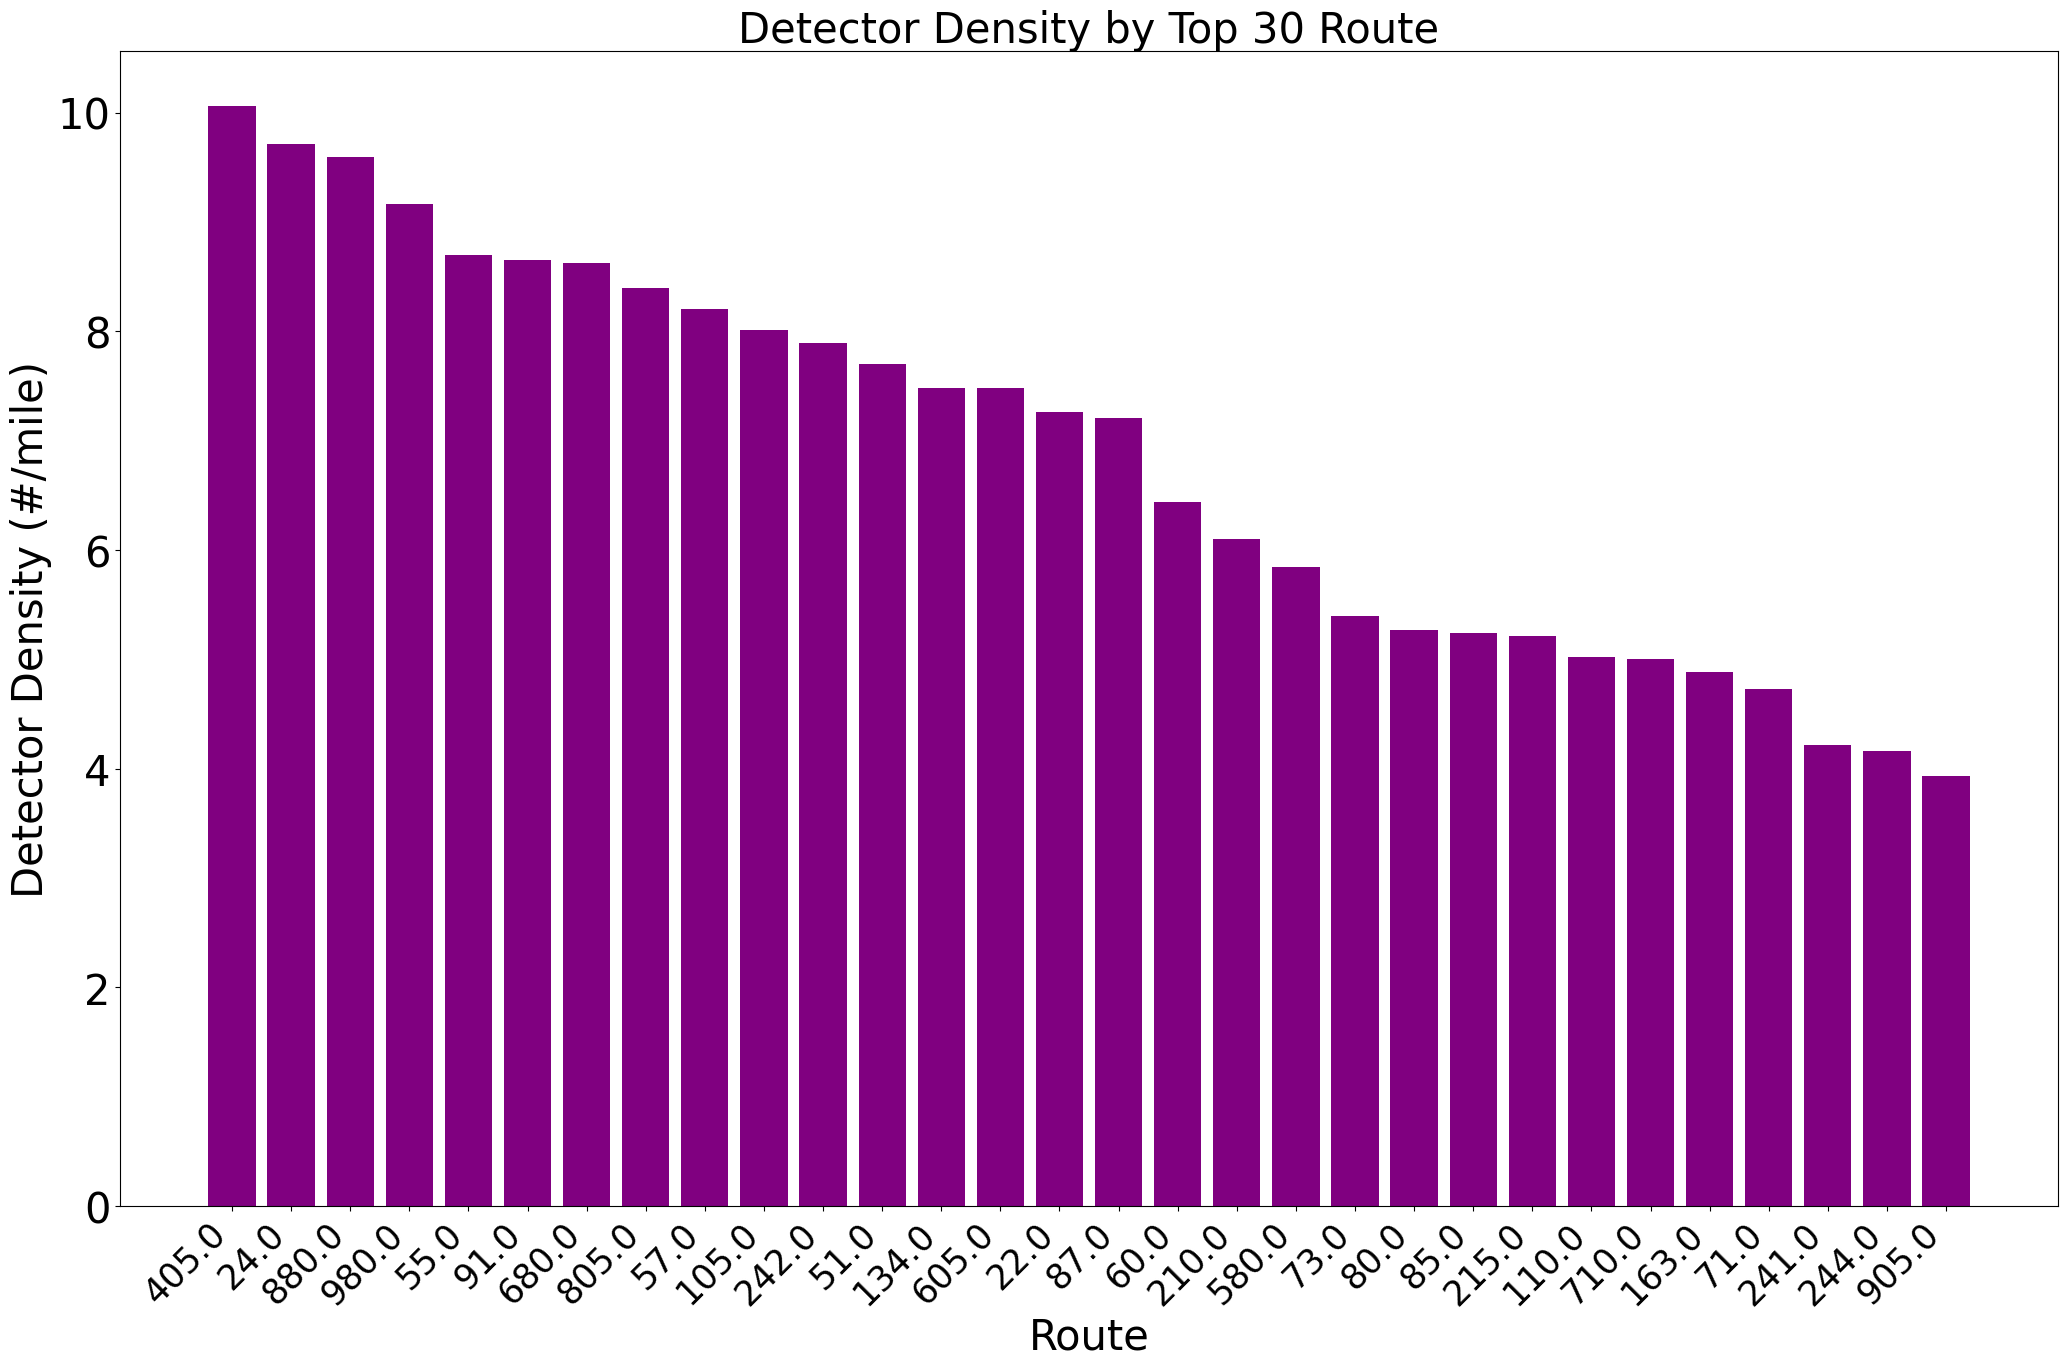

In [395]:
# Sorting the data in descending order
detetor_density_by_route_sorted = detetor_density_by_route.sort_values(by='detector_density_by_route', ascending=False).head(30)
detetor_density_by_route_sorted['Route'] = detetor_density_by_route_sorted['Route'].astype(str)
detetor_density_by_route_sorted['Route'] = pd.Categorical(detetor_density_by_route_sorted['Route'], 
                                                               categories=detetor_density_by_route_sorted['Route'], 
                                                               ordered=True)


# Plotting the bar chart
plt.figure(figsize=(25, 15))
plt.bar(detetor_density_by_route_sorted['Route'], detetor_density_by_route_sorted['detector_density_by_route'], color='purple')
plt.xlabel("Route",fontsize=30)
plt.ylabel("Detector Density (#/mile)",fontsize=30)
plt.title("Detector Density by Top 30 Route",fontsize=30)

# Adjust x-axis label rotation and alignment
plt.xticks(rotation=45, ha='right', fontsize=25)
plt.yticks(fontsize=30)
plt.show()

In [396]:
# Now join detector density by district, county and route with link level density for the visulization
detetor_density_by_district1=detetor_density_by_district_pop[['District', 'detector_density_by_district','detector_density_by_pop']]
detetor_density_by_county1=detetor_density_by_county[['County', 'detector_density_by_county']]
detetor_density_by_route1=detetor_density_by_route[['Route','detector_density_by_route']]
shs_link_dist_den=pd.merge(shs_link_pems_sensor_density,detetor_density_by_district1, on=['District'], how='inner')
shs_link_dist_cty_den=pd.merge(shs_link_dist_den,detetor_density_by_county, on=['County'], how='outer')
shs_link_dist_cty_rte_den=pd.merge(shs_link_dist_cty_den,detetor_density_by_route1, on=['Route'], how='outer')
shs_link_dist_cty_rte_den=shs_link_dist_cty_rte_den.drop_duplicates(subset=['OBJECTID'], keep='first')
# Replace all NA density with zero
shs_link_dist_cty_rte_den['detector_density_by_district'] = shs_link_dist_cty_rte_den['detector_density_by_district'].fillna(0)
shs_link_dist_cty_rte_den['detector_density_by_county'] = shs_link_dist_cty_rte_den['detector_density_by_county'].fillna(0)
shs_link_dist_cty_rte_den['detector_density_by_route'] = shs_link_dist_cty_rte_den['detector_density_by_route'].fillna(0)
shs_link_dist_cty_rte_den['detector_density_by_pop'] = shs_link_dist_cty_rte_den['detector_density_by_pop'].fillna(0)
shs_link_dist_cty_rte_den['detector_desity_per_1000_AADT'] = shs_link_dist_cty_rte_den['detector_desity_per_1000_AADT'].fillna(0)
shs_link_dist_cty_rte_den['detector_density_per_lane_length_mile_1000_AADT'] = shs_link_dist_cty_rte_den['detector_density_per_lane_length_mile_1000_AADT'].fillna(0)
shs_link_dist_cty_rte_den['Segment_status_avg'] = shs_link_dist_cty_rte_den['Segment_status_avg'].fillna(0)
shs_link_dist_cty_rte_den =shs_link_dist_cty_rte_den.dropna(subset=['District'])
shs_link_dist_cty_rte_den.shape

(5238, 21)

In [397]:
shs_link_dist_cty_rte_den.head()

,OBJECTID,geometry,County,District,Route,Direction,DETECTOR_ID_count,Segment_length_mile_avg,Segment_aadt_avg,Segment_status_avg,...,Segment_lane_length_mile,detector_desity_per_lane_mile,detector_desity_per_1000_AADT,detector_density_per_lane_length_mile_1000_AADT,detector_density_by_district,detector_density_by_pop,detector_count,Segment_length_mile_sum,detector_density_by_county,detector_density_by_route
0,1.0,"MULTILINESTRING ((-58329.675 142277.358, -5832...",Placer,3.0,80.0,WB,2.0,1.053200,14.216220,0.000000,...,2.106401,0.949487,0.140684,0.066789,0.872351,0.879586,316.0,305.261026,1.03518,5.269574
1,4.0,"MULTILINESTRING ((-85592.441 111385.108, -8558...",Placer,3.0,80.0,WB,14.0,22.255522,14.090643,76.877000,...,44.511043,0.314529,0.993567,0.022322,0.872351,0.879586,316.0,305.261026,1.03518,5.269574
2,5.0,"MULTILINESTRING ((-112373.646 79179.862, -1122...",Placer,3.0,80.0,WB,86.0,18.834001,50.165451,79.241399,...,58.254004,1.476293,1.714327,0.029428,0.872351,0.879586,316.0,305.261026,1.03518,5.269574
3,724.0,"MULTILINESTRING ((-86056.269 110068.353, -8598...",Placer,3.0,80.0,WB,2.0,0.890379,19.891618,79.041100,...,1.780757,1.123118,0.100545,0.056462,0.872351,0.879586,316.0,305.261026,1.03518,5.269574
4,2189.0,"MULTILINESTRING ((-92137.234 100470.422, -9211...",Placer,3.0,80.0,WB,6.0,4.797831,25.864589,82.739750,...,14.393492,0.416855,0.231977,0.016117,0.872351,0.879586,316.0,305.261026,1.03518,5.269574


In [398]:
shs_link_dist_cty_rte_den.County.isna().sum()

40

In [399]:
shs_link_dist_cty_rte_den.Route.isna().sum()

0

In [400]:
shs_link_dist_cty_rte_den.District.isna().sum()

0

In [401]:
shs_link_dist_cty_rte_den.District.isna().sum()

0

In [402]:
shs_link_dist_cty_rte_den.District.unique()

array([ 3.,  4.,  6., 10.,  2.,  9.,  1., 11., 12.,  7.,  8.,  5.])

In [403]:
summary_gdf = gpd.GeoDataFrame(shs_link_dist_cty_rte_den, geometry='geometry', crs="EPSG:3310")
# Transform CRS to EPSG:4326
summary_gdf_4326 = summary_gdf.to_crs("EPSG:4326")
# Save as GeoJSON
crs = {'init': 'epsg:4326'}
final_data = gpd.GeoDataFrame(summary_gdf_4326, crs=crs, geometry = 'geometry')
final_data.to_file("pems_coverage_epsg_4326.json", driver="GeoJSON")

/home/jupyter/venv/arcgis_env/lib64/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [404]:
final_data.head()

,OBJECTID,geometry,County,District,Route,Direction,DETECTOR_ID_count,Segment_length_mile_avg,Segment_aadt_avg,Segment_status_avg,...,Segment_lane_length_mile,detector_desity_per_lane_mile,detector_desity_per_1000_AADT,detector_density_per_lane_length_mile_1000_AADT,detector_density_by_district,detector_density_by_pop,detector_count,Segment_length_mile_sum,detector_density_by_county,detector_density_by_route
0,1.0,"MULTILINESTRING ((-120.67684 39.29449, -120.67...",Placer,3.0,80.0,WB,2.0,1.053200,14.216220,0.000000,...,2.106401,0.949487,0.140684,0.066789,0.872351,0.879586,316.0,305.261026,1.03518,5.269574
1,4.0,"MULTILINESTRING ((-120.98943 39.01439, -120.98...",Placer,3.0,80.0,WB,14.0,22.255522,14.090643,76.877000,...,44.511043,0.314529,0.993567,0.022322,0.872351,0.879586,316.0,305.261026,1.03518,5.269574
2,5.0,"MULTILINESTRING ((-121.2939 38.72176, -121.292...",Placer,3.0,80.0,WB,86.0,18.834001,50.165451,79.241399,...,58.254004,1.476293,1.714327,0.029428,0.872351,0.879586,316.0,305.261026,1.03518,5.269574
3,724.0,"MULTILINESTRING ((-120.99463 39.0025, -120.993...",Placer,3.0,80.0,WB,2.0,0.890379,19.891618,79.041100,...,1.780757,1.123118,0.100545,0.056462,0.872351,0.879586,316.0,305.261026,1.03518,5.269574
4,2189.0,"MULTILINESTRING ((-121.06366 38.91555, -121.06...",Placer,3.0,80.0,WB,6.0,4.797831,25.864589,82.739750,...,14.393492,0.416855,0.231977,0.016117,0.872351,0.879586,316.0,305.261026,1.03518,5.269574


In [405]:
shs_link_dist_cty_rte_den['Segment_status_avg'].describe()

count    5238.000000
mean       10.491458
std        25.986220
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        99.726000
Name: Segment_status_avg, dtype: float64

In [406]:
# End of the script